In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [2]:
df = pd.read_csv('C://Users//zhuzh//OneDrive//Рабочий стол//Neoland//proyectos//Covid Mexico//201114COVID19MEXICO.csv', encoding = 'cp860')

In [4]:
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-11-14,071735,2,9,21,2,21,21,114,1,...,2,2,2,1,1,3,99,M├Òxico,97,97
1,2020-11-14,1468a5,1,4,5,1,15,5,18,1,...,2,2,1,1,1,3,99,M├Òxico,97,97
2,2020-11-14,043f64,2,4,9,2,9,9,10,2,...,1,2,99,1,1,3,99,M├Òxico,97,1
3,2020-11-14,0e07d8,1,4,15,2,15,15,104,2,...,2,2,99,1,1,3,99,M├Òxico,97,2
4,2020-11-14,13757c,1,12,15,1,15,15,106,1,...,2,2,1,1,1,3,99,M├Òxico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604654,2020-11-14,20edd4,2,4,30,1,30,30,44,1,...,2,2,2,1,4,6,99,M├Òxico,97,97
2604655,2020-11-14,3b9335,1,4,6,1,6,6,2,1,...,2,2,2,2,97,6,99,M├Òxico,97,97
2604656,2020-11-14,1ef034,2,10,9,1,13,15,58,2,...,2,2,2,2,97,1,99,M├Òxico,97,2
2604657,2020-11-14,2e7cc4,2,12,15,1,15,15,63,1,...,2,2,1,2,97,6,99,M├Òxico,97,97


In [5]:
df['PAIS_NACIONALIDAD'].value_counts() 

M├Òxico                                                    2592122
Estados Unidos de Am├Òrica                                    3174
Colombia                                                      1248
Venezuela                                                     1220
Cuba                                                           724
                                                            ...   
Afganist├ín                                                      1
Pa├¡ses de la Ex-U.R.S.S., excepto Ucrania y Bielorusia          1
Eritrea                                                          1
Rep├║blica Centro Africana                                       1
Estado de Kuwait                                                 1
Name: PAIS_NACIONALIDAD, Length: 134, dtype: int64

In [6]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA', 'RESULTADO_LAB', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [7]:
df['NACIONALIDAD'].value_counts()

1    2592118
2      12541
Name: NACIONALIDAD, dtype: int64

In [8]:
pd.__version__

'1.1.3'

In [13]:
for i in df.columns: #see how values are distributed
    print(df[i].value_counts(normalize=True)*100)
    print('******')

2020-11-14    100.0
Name: FECHA_ACTUALIZACION, dtype: float64
******
072dcb    0.000038
2dc3af    0.000038
2f99e5    0.000038
15b3d4    0.000038
3f58f8    0.000038
            ...   
11a85c    0.000038
313d16    0.000038
41dd70    0.000038
137653    0.000038
156209    0.000038
Name: ID_REGISTRO, Length: 2604659, dtype: float64
******
2    65.369709
1    34.630291
Name: ORIGEN, dtype: float64
******
12    61.885951
4     26.435668
6      3.907959
9      3.529214
3      1.513787
8      0.800796
10     0.667765
5      0.630908
11     0.405120
13     0.081354
7      0.077630
2      0.047146
1      0.016317
99     0.000384
Name: SECTOR, dtype: float64
******
9     25.871064
15     7.884794
19     5.431191
11     5.406312
14     3.941744
21     3.738148
5      3.662130
27     3.421600
28     3.305078
24     2.977895
26     2.860682
30     2.692637
16     2.542982
2      2.525167
31     2.051823
25     1.952808
8      1.924551
10     1.661408
12     1.601284
7      1.570762
1      1.559897
3 

In [3]:
df = df.drop(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'MUNICIPIO_RES', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN'], axis = 1) #remove unnecessary columns

In [4]:
del df['MIGRANTE']

In [5]:
del df['RESULTADO_LAB']

In [20]:
df.columns

Index(['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES',
       'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF',
       'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'INDIGENA', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA',
       'RESULTADO_LAB', 'CLASIFICACION_FINAL', 'UCI'],
      dtype='object')

In [6]:
df1 = df.copy()

In [7]:
df1 =df1.replace(99,np.nan)
df1 =df1.replace(98,np.nan)

In [142]:
df1.isnull().sum()/len(df1)*100 #check % of nulls

ORIGEN                 0.000000
SECTOR                 0.000449
ENTIDAD_UM             0.000000
SEXO                   0.000000
ENTIDAD_NAC            0.468642
ENTIDAD_RES            0.000000
TIPO_PACIENTE          0.000000
FECHA_INGRESO          0.000000
FECHA_SINTOMAS         0.000000
FECHA_DEF              0.000000
INTUBADO               0.265273
NEUMONIA               0.306064
EDAD                   0.017835
NACIONALIDAD           0.000000
EMBARAZO               0.354941
HABLA_LENGUA_INDIG     3.842487
INDIGENA               3.730673
DIABETES               0.320529
EPOC                   0.298112
ASMA                   0.293800
INMUSUPR               0.312488
HIPERTENSION           0.300988
OTRA_COM               0.458939
CARDIOVASCULAR         0.298382
OBESIDAD               0.284590
RENAL_CRONICA          0.293800
TABAQUISMO             0.311275
OTRO_CASO              9.752489
TOMA_MUESTRA           0.000000
CLASIFICACION_FINAL    0.000000
UCI                    0.285489
dtype: f

In [8]:
df['CLASIFICACION_FINAL'] = df['CLASIFICACION_FINAL'].replace({2:1, 3:1}) # 1 is covid positive, 0 is covid negative 

In [9]:
df = df.drop(df[df['CLASIFICACION_FINAL'].isin([4,5,6]) ].index, axis=0) #group the final clasification and remove the rest

In [10]:
df = df.reset_index(drop = True)

In [39]:
for i in df.columns:
    print(df[i].value_counts(normalize=True)*100)
    print('******')

2    66.918104
1    33.081896
Name: ORIGEN, dtype: float64
******
12    64.031948
4     25.186365
6      3.860681
9      2.765267
3      1.602556
8      0.776503
10     0.595057
5      0.592990
11     0.356243
13     0.081581
7      0.081536
2      0.053324
1      0.015499
99     0.000449
Name: SECTOR, dtype: float64
******
9     25.988340
15     7.103350
11     5.847963
19     5.590506
14     3.827483
21     3.821508
5      3.752551
27     3.701203
28     3.478068
24     3.224475
26     3.052822
16     2.839570
30     2.735976
31     2.122546
25     1.922142
2      1.849411
8      1.833778
10     1.787506
12     1.761316
3      1.623715
1      1.503410
22     1.469673
20     1.445144
13     1.282746
32     1.174885
23     1.102558
29     1.044112
4      0.724886
17     0.689576
7      0.600582
6      0.553098
18     0.545102
Name: ENTIDAD_UM, dtype: float64
******
1    51.531038
2    48.468962
Name: SEXO, dtype: float64
******
9     22.891223
15    10.029623
11     5.625142
19     4.6

In [11]:
df['CLASIFICACION_FINAL'] = df['CLASIFICACION_FINAL'].replace(7,0)

In [12]:
df1 = df.copy()

# 1 positivo, 0 negativo 

In [13]:
df1 =df1.replace(99,np.nan) #replace unknown values with nans
df1 =df1.replace(98,np.nan)

In [149]:
df1.isnull().sum()/len(df1)*100

ORIGEN                 0.000000
SECTOR                 0.000449
ENTIDAD_UM             0.000000
SEXO                   0.000000
ENTIDAD_NAC            0.468642
ENTIDAD_RES            0.000000
TIPO_PACIENTE          0.000000
FECHA_INGRESO          0.000000
FECHA_SINTOMAS         0.000000
FECHA_DEF              0.000000
INTUBADO               0.265273
NEUMONIA               0.306064
EDAD                   0.017835
NACIONALIDAD           0.000000
EMBARAZO               0.354941
HABLA_LENGUA_INDIG     3.842487
INDIGENA               3.730673
DIABETES               0.320529
EPOC                   0.298112
ASMA                   0.293800
INMUSUPR               0.312488
HIPERTENSION           0.300988
OTRA_COM               0.458939
CARDIOVASCULAR         0.298382
OBESIDAD               0.284590
RENAL_CRONICA          0.293800
TABAQUISMO             0.311275
OTRO_CASO              9.752489
TOMA_MUESTRA           0.000000
CLASIFICACION_FINAL    0.000000
UCI                    0.285489
dtype: f

In [14]:
df1 = df1.replace(97,2 #in our dataset value 97 is not applicable so we treat it as no

In [119]:
for i in df1.columns:
    print(df1[i].value_counts(normalize=True)*100)
    print('******')

2    66.918104
1    33.081896
Name: ORIGEN, dtype: float64
******
12.0    64.032235
4.0     25.186478
6.0      3.860699
9.0      2.765279
3.0      1.602564
8.0      0.776506
10.0     0.595059
5.0      0.592993
11.0     0.356245
13.0     0.081581
7.0      0.081537
2.0      0.053324
1.0      0.015499
Name: SECTOR, dtype: float64
******
9     25.988340
15     7.103350
11     5.847963
19     5.590506
14     3.827483
21     3.821508
5      3.752551
27     3.701203
28     3.478068
24     3.224475
26     3.052822
16     2.839570
30     2.735976
31     2.122546
25     1.922142
2      1.849411
8      1.833778
10     1.787506
12     1.761316
3      1.623715
1      1.503410
22     1.469673
20     1.445144
13     1.282746
32     1.174885
23     1.102558
29     1.044112
4      0.724886
17     0.689576
7      0.600582
6      0.553098
18     0.545102
Name: ENTIDAD_UM, dtype: float64
******
1    51.531038
2    48.468962
Name: SEXO, dtype: float64
******
9.0     22.999006
15.0    10.076847
11.0     5.6

In [15]:
df1['OTRO_CASO'].values.reshape(2226006,1) #we have 9% nulls in Otro caso column and we will replace it with modes

array([[ 2.],
       [ 1.],
       [nan],
       ...,
       [ 2.],
       [ 2.],
       [ 2.]])

In [16]:
from sklearn.impute import SimpleImputer # replace with modes

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df1['OTRO_CASO'] = imputer.fit_transform(df1['OTRO_CASO'].values.reshape(2226006,1))

In [121]:
df1.shape

(2226006, 31)

In [122]:
df1.isnull().sum()/len(df1)*100

ORIGEN                 0.000000
SECTOR                 0.000449
ENTIDAD_UM             0.000000
SEXO                   0.000000
ENTIDAD_NAC            0.468642
ENTIDAD_RES            0.000000
TIPO_PACIENTE          0.000000
FECHA_INGRESO          0.000000
FECHA_SINTOMAS         0.000000
FECHA_DEF              0.000000
INTUBADO               0.265273
NEUMONIA               0.306064
EDAD                   0.017835
NACIONALIDAD           0.000000
EMBARAZO               0.354941
HABLA_LENGUA_INDIG     3.842487
INDIGENA               3.730673
DIABETES               0.320529
EPOC                   0.298112
ASMA                   0.293800
INMUSUPR               0.312488
HIPERTENSION           0.300988
OTRA_COM               0.458939
CARDIOVASCULAR         0.298382
OBESIDAD               0.284590
RENAL_CRONICA          0.293800
TABAQUISMO             0.311275
OTRO_CASO              0.000000
TOMA_MUESTRA           0.000000
CLASIFICACION_FINAL    0.000000
UCI                    0.285489
dtype: f

In [100]:
for i in df1.columns:
    print(df1[i].value_counts(normalize=True)*100)
    print('******')

2    66.918104
1    33.081896
Name: ORIGEN, dtype: float64
******
12.0    64.032235
4.0     25.186478
6.0      3.860699
9.0      2.765279
3.0      1.602564
8.0      0.776506
10.0     0.595059
5.0      0.592993
11.0     0.356245
13.0     0.081581
7.0      0.081537
2.0      0.053324
1.0      0.015499
Name: SECTOR, dtype: float64
******
9     25.988340
15     7.103350
11     5.847963
19     5.590506
14     3.827483
21     3.821508
5      3.752551
27     3.701203
28     3.478068
24     3.224475
26     3.052822
16     2.839570
30     2.735976
31     2.122546
25     1.922142
2      1.849411
8      1.833778
10     1.787506
12     1.761316
3      1.623715
1      1.503410
22     1.469673
20     1.445144
13     1.282746
32     1.174885
23     1.102558
29     1.044112
4      0.724886
17     0.689576
7      0.600582
6      0.553098
18     0.545102
Name: ENTIDAD_UM, dtype: float64
******
1    51.531038
2    48.468962
Name: SEXO, dtype: float64
******
9.0     22.999006
15.0    10.076847
11.0     5.6

In [17]:
del df1['ENTIDAD_NAC']
del df1['ENTIDAD_RES']
del df1['HABLA_LENGUA_INDIG']
del df1['INDIGENA']

In [18]:
df2 = df1.copy()
df2.dropna(axis=0, inplace = True) #drop nulls
df2.shape

(2195185, 27)

In [125]:
df2.isnull().sum()/len(df2)*100

ORIGEN                 0.0
SECTOR                 0.0
ENTIDAD_UM             0.0
SEXO                   0.0
TIPO_PACIENTE          0.0
FECHA_INGRESO          0.0
FECHA_SINTOMAS         0.0
FECHA_DEF              0.0
INTUBADO               0.0
NEUMONIA               0.0
EDAD                   0.0
NACIONALIDAD           0.0
EMBARAZO               0.0
DIABETES               0.0
EPOC                   0.0
ASMA                   0.0
INMUSUPR               0.0
HIPERTENSION           0.0
OTRA_COM               0.0
CARDIOVASCULAR         0.0
OBESIDAD               0.0
RENAL_CRONICA          0.0
TABAQUISMO             0.0
OTRO_CASO              0.0
TOMA_MUESTRA           0.0
CLASIFICACION_FINAL    0.0
UCI                    0.0
dtype: float64

# Part 2

Number of covid positives = 991464, 46% 

Number of deaths = 120540, 0.05% 

Percentage of deaths from all positives = 12% 

The regions with the highest infections :

9 CIUDAD DE MÉXICO   210252

15   MÉXICO  70447

19   NUEVO LEÓN  59957

Middle age of positives = 44.26

Middle age of dead = 62

AVG time between simptoms and deaths = 12.8 days

The most common previous sickness of positives = Hypertension 

The most common previous sickness of dead = Hypertension 


In [126]:
df2[df2['CLASIFICACION_FINAL']==1]

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI
0,2,9.0,21,2,1,2020-03-18,2020-03-12,9999-99-99,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1,1,2.0
1,1,4.0,5,1,1,2020-04-02,2020-03-27,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0
2,2,4.0,9,2,2,2020-03-26,2020-03-26,2020-03-30,2.0,1.0,...,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1,1,1.0
3,1,4.0,15,2,2,2020-03-28,2020-03-28,2020-04-02,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0
4,1,12.0,15,1,1,2020-03-31,2020-03-27,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226000,2,10.0,9,2,2,2020-10-03,2020-10-01,2020-10-20,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0
2226002,1,12.0,26,2,1,2020-10-13,2020-10-09,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,1,2.0
2226003,1,6.0,9,1,2,2020-10-16,2020-10-09,2020-10-24,1.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0
2226004,2,10.0,9,2,2,2020-11-09,2020-11-09,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0


In [128]:
1003253/len(df2)

0.45702435102280675

In [22]:
df2['MUERTE'] = df2['FECHA_DEF'].map(lambda x: 0 if x=='9999-99-99' else 1 ) # we create a new column called death, where if there is 
#a death date then yes, if no date is mentioned then the patient didn't die

In [131]:
df2[df2['MUERTE']==1]

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI,MUERTE
2,2,4.0,9,2,2,2020-03-26,2020-03-26,2020-03-30,2.0,1.0,...,2.0,2.0,2.0,1.0,2.0,1.0,1,1,1.0,1
3,1,4.0,15,2,2,2020-03-28,2020-03-28,2020-04-02,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0,1
6,1,12.0,9,2,1,2020-03-29,2020-03-25,2020-04-05,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0,1
9,2,4.0,14,2,2,2020-03-27,2020-03-27,2020-03-31,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,1,1,2.0,1
17,1,13.0,21,1,2,2020-03-28,2020-03-23,2020-04-05,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,1,1,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225965,2,10.0,6,1,2,2020-10-19,2020-10-15,2020-10-25,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,1.0,1
2225993,1,12.0,5,2,2,2020-10-27,2020-10-19,2020-10-30,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0,1
2225994,2,10.0,9,2,2,2020-10-09,2020-10-07,2020-10-23,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0,1
2226000,2,10.0,9,2,2,2020-10-03,2020-10-01,2020-10-20,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0,1


In [132]:
120540/len(df2)

0.054911089498151634

In [139]:
len(df2[df2['MUERTE']==1]) / len(df2[df2['CLASIFICACION_FINAL']==1])

0.12157778799835395

In [85]:
df2

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI,MUERTE
0,2,9.0,21,2,21.0,21,1,2020-03-18,2020-03-12,9999-99-99,...,2.0,1.0,2.0,2.0,2.0,2.0,1,1,97.0,0
1,1,4.0,5,1,15.0,5,1,2020-04-02,2020-03-27,9999-99-99,...,2.0,2.0,2.0,2.0,2.0,1.0,1,1,97.0,0
2,2,4.0,9,2,9.0,9,2,2020-03-26,2020-03-26,2020-03-30,...,2.0,2.0,2.0,1.0,2.0,1.0,1,1,1.0,1
3,1,4.0,15,2,15.0,15,2,2020-03-28,2020-03-28,2020-04-02,...,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0,1
4,1,12.0,15,1,15.0,15,1,2020-03-31,2020-03-27,9999-99-99,...,2.0,2.0,2.0,2.0,2.0,1.0,1,1,97.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226000,2,10.0,9,2,15.0,15,2,2020-10-03,2020-10-01,2020-10-20,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0,1
2226002,1,12.0,26,2,26.0,26,1,2020-10-13,2020-10-09,9999-99-99,...,2.0,2.0,2.0,2.0,2.0,1.0,2,1,97.0,0
2226003,1,6.0,9,1,29.0,15,2,2020-10-16,2020-10-09,2020-10-24,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0,1
2226004,2,10.0,9,2,11.0,15,2,2020-11-09,2020-11-09,9999-99-99,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0,0


In [95]:
for i in df2.columns:
    print(df2[i].value_counts(normalize=True)*100)
    print('******')

2    66.95514
1    33.04486
Name: ORIGEN, dtype: float64
******
12.0    63.259034
4.0     26.436498
6.0      3.689344
9.0      2.429928
3.0      1.619698
8.0      0.777278
5.0      0.620565
10.0     0.580280
11.0     0.358711
13.0     0.081142
7.0      0.080428
2.0      0.051857
1.0      0.015238
Name: SECTOR, dtype: float64
******
1    51.517342
2    48.482658
Name: SEXO, dtype: float64
******
9.0     22.914723
15.0    10.065090
11.0     5.808275
19.0     4.680382
30.0     4.063769
14.0     3.899294
21.0     3.586726
5.0      3.570060
27.0     3.567869
28.0     3.319443
24.0     3.296015
16.0     3.234015
26.0     2.919352
25.0     2.352167
12.0     2.335310
20.0     2.194311
31.0     2.164264
10.0     1.819839
8.0      1.644460
13.0     1.493223
32.0     1.400462
1.0      1.319415
2.0      1.209893
29.0     1.120036
3.0      1.028466
7.0      1.023323
22.0     0.988323
17.0     0.742945
4.0      0.674755
18.0     0.642279
23.0     0.474805
6.0      0.446710
Name: ENTIDAD_NAC, dtype: 

In [133]:
df2

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI,MUERTE
0,2,9.0,21,2,1,2020-03-18,2020-03-12,9999-99-99,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1,1,2.0,0
1,1,4.0,5,1,1,2020-04-02,2020-03-27,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0,0
2,2,4.0,9,2,2,2020-03-26,2020-03-26,2020-03-30,2.0,1.0,...,2.0,2.0,2.0,1.0,2.0,1.0,1,1,1.0,1
3,1,4.0,15,2,2,2020-03-28,2020-03-28,2020-04-02,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0,1
4,1,12.0,15,1,1,2020-03-31,2020-03-27,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226000,2,10.0,9,2,2,2020-10-03,2020-10-01,2020-10-20,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0,1
2226002,1,12.0,26,2,1,2020-10-13,2020-10-09,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2,1,2.0,0
2226003,1,6.0,9,1,2,2020-10-16,2020-10-09,2020-10-24,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0,1
2226004,2,10.0,9,2,2,2020-11-09,2020-11-09,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0,0


In [20]:
df2.groupby('ENTIDAD_UM')['CLASIFICACION_FINAL'].sum().sort_values(ascending = False)

ENTIDAD_UM
9     210252
15     70447
19     59957
11     53865
26     40203
21     38387
30     37292
5      36928
14     35653
27     35554
28     33288
24     31236
16     26514
8      24453
2      23918
31     22563
25     22535
20     22466
12     22309
22     17262
10     16721
13     16490
3      13416
23     13333
32     13281
1      10973
29      7497
7       7197
6       7001
17      6880
18      6822
4       6771
Name: CLASIFICACION_FINAL, dtype: int64

In [20]:
df2[df2['CLASIFICACION_FINAL']==1]['EDAD'].mean()

44.26368884800658

In [158]:
df2[df2['MUERTE']==1]['EDAD'].mean()

62.26726397876224

In [20]:
dfdate = df2[df2['MUERTE']==1].reset_index(drop=True)
dfdate

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI,MUERTE
0,2,4.0,9,2,2,2020-03-26,2020-03-26,2020-03-30,2.0,1.0,...,2.0,2.0,2.0,1.0,2.0,1.0,1,1,1.0,1
1,1,4.0,15,2,2,2020-03-28,2020-03-28,2020-04-02,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0,1
2,1,12.0,9,2,1,2020-03-29,2020-03-25,2020-04-05,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0,1
3,2,4.0,14,2,2,2020-03-27,2020-03-27,2020-03-31,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,1,1,2.0,1
4,1,13.0,21,1,2,2020-03-28,2020-03-23,2020-04-05,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,1,1,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120535,2,10.0,6,1,2,2020-10-19,2020-10-15,2020-10-25,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,1.0,1
120536,1,12.0,5,2,2,2020-10-27,2020-10-19,2020-10-30,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0,1
120537,2,10.0,9,2,2,2020-10-09,2020-10-07,2020-10-23,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0,1
120538,2,10.0,9,2,2,2020-10-03,2020-10-01,2020-10-20,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0,1


In [19]:
import time
import datetime

In [166]:
dfdate.loc[0,'FECHA_SINTOMAS']

'2020-03-26'

In [22]:
fechasimp = datetime.datetime.strptime(dfdate.loc[0,'FECHA_SINTOMAS'], "%Y-%m-%d")

In [23]:
fecham = datetime.datetime.strptime(dfdate.loc[0,'FECHA_DEF'], "%Y-%m-%d")

In [175]:
fecham - fechasimp

datetime.timedelta(days=4)

In [24]:
dfdate = df2[df2['MUERTE']==1].reset_index(drop=True)

lista_fechas = []
for i in range(len(dfdate)):
    fechasimp = datetime.datetime.strptime(dfdate.loc[i,'FECHA_SINTOMAS'], "%Y-%m-%d")
    fecham = datetime.datetime.strptime(dfdate.loc[i,'FECHA_DEF'], "%Y-%m-%d")
    lista_fechas.append((fecham  - fechasimp).days)
np.array(lista_fechas).mean()
np.array(lista_fechas).max()

211

In [186]:
lista_fechas

[4,
 5,
 11,
 4,
 13,
 7,
 6,
 13,
 30,
 8,
 7,
 21,
 27,
 8,
 11,
 29,
 39,
 20,
 22,
 15,
 10,
 17,
 12,
 14,
 29,
 14,
 55,
 27,
 33,
 16,
 7,
 4,
 16,
 10,
 10,
 20,
 24,
 7,
 23,
 13,
 17,
 13,
 15,
 16,
 13,
 13,
 2,
 10,
 3,
 16,
 13,
 48,
 5,
 18,
 17,
 11,
 14,
 8,
 8,
 34,
 3,
 12,
 11,
 6,
 7,
 15,
 7,
 29,
 9,
 8,
 22,
 17,
 42,
 22,
 4,
 19,
 0,
 11,
 4,
 11,
 26,
 54,
 21,
 24,
 14,
 10,
 6,
 11,
 16,
 36,
 9,
 19,
 4,
 56,
 15,
 7,
 43,
 14,
 32,
 18,
 14,
 9,
 27,
 18,
 13,
 15,
 26,
 17,
 19,
 23,
 12,
 8,
 44,
 10,
 20,
 11,
 35,
 13,
 25,
 9,
 7,
 10,
 18,
 30,
 13,
 5,
 7,
 24,
 15,
 17,
 25,
 10,
 7,
 9,
 11,
 7,
 10,
 12,
 12,
 5,
 25,
 10,
 6,
 12,
 17,
 33,
 10,
 7,
 23,
 9,
 10,
 12,
 12,
 15,
 21,
 9,
 11,
 15,
 10,
 23,
 9,
 9,
 17,
 10,
 21,
 10,
 6,
 15,
 11,
 10,
 15,
 32,
 13,
 16,
 9,
 6,
 4,
 23,
 5,
 16,
 45,
 16,
 12,
 16,
 10,
 5,
 10,
 11,
 11,
 13,
 19,
 30,
 45,
 186,
 6,
 15,
 12,
 13,
 4,
 44,
 45,
 8,
 6,
 6,
 16,
 9,
 7,
 8,
 12,
 11,
 9,
 16,

In [192]:
df2[df2['CLASIFICACION_FINAL']==1]['DIABETES'].value_counts()

2.0    845134
1.0    146330
Name: DIABETES, dtype: int64

In [191]:
df2.columns

Index(['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA',
       'CLASIFICACION_FINAL', 'UCI', 'MUERTE'],
      dtype='object')

In [25]:
enfermedades = ['DIABETES', 'EPOC', 'ASMA','INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD','RENAL_CRONICA']

In [27]:
dic = dict()  #The most common previous sickness of positives 
for i in enfermedades:
    num = len(df2[(df2['CLASIFICACION_FINAL']==1) & (df2[i]==1)][i])
    dic[num] = i
dic.get(np.array(list(dic.keys())).max())

'HIPERTENSION'

In [344]:
dic

{146330: 'DIABETES',
 13265: 'EPOC',
 24862: 'ASMA',
 10089: 'INMUSUPR',
 186066: 'HIPERTENSION',
 22567: 'OTRA_COM',
 18410: 'CARDIOVASCULAR',
 169500: 'OBESIDAD',
 17789: 'RENAL_CRONICA'}

In [29]:
def devuelve_maximo(d):
    v=list(d.values())
    k=list(d.keys())
    return k[v.index(max(v))]


In [30]:
#other option to create dictionary and find max 

dic3 = dict()
for i in enfermedades:
    num = len(df2[(df2['CLASIFICACION_FINAL']==1) & (df2[i]==1)][i])
    dic3[i] = num
#dic3.get(np.array(list(dic3.keys())).max())

devuelve_maximo(dic3)

'HIPERTENSION'

In [31]:
#most common sickness among death cases 

dic2 = dict()
for i in enfermedades:
    num = len(df2[(df2['MUERTE']==1) & (df2[i]==1)][i])
    dic2[num] = i
dic2.get(np.array(list(dic2.keys())).max())

'HIPERTENSION'

In [236]:
dic2

{46682: 'DIABETES',
 6413: 'EPOC',
 2350: 'ASMA',
 3793: 'INMUSUPR',
 54691: 'HIPERTENSION',
 7754: 'OTRA_COM',
 7241: 'CARDIOVASCULAR',
 27418: 'OBESIDAD',
 10142: 'RENAL_CRONICA'}

In [239]:
df2

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI,MUERTE
0,2,9.0,21,2,1,2020-03-18,2020-03-12,9999-99-99,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1,1,2.0,0
1,1,4.0,5,1,1,2020-04-02,2020-03-27,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0,0
2,2,4.0,9,2,2,2020-03-26,2020-03-26,2020-03-30,2.0,1.0,...,2.0,2.0,2.0,1.0,2.0,1.0,1,1,1.0,1
3,1,4.0,15,2,2,2020-03-28,2020-03-28,2020-04-02,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0,1
4,1,12.0,15,1,1,2020-03-31,2020-03-27,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226000,2,10.0,9,2,2,2020-10-03,2020-10-01,2020-10-20,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0,1
2226002,1,12.0,26,2,1,2020-10-13,2020-10-09,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2,1,2.0,0
2226003,1,6.0,9,1,2,2020-10-16,2020-10-09,2020-10-24,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0,1
2226004,2,10.0,9,2,2,2020-11-09,2020-11-09,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0,0


# Visualizations

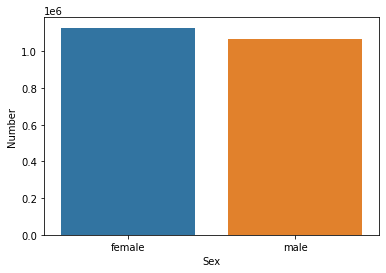

In [251]:
# Number of males and females, quite balanced 

ax = sns.countplot(x = df2['SEXO'])
ax.set(xlabel = 'Sex')
ax.set(ylabel = 'Number')
ax.set_xticklabels(['female', 'male'])
plt.show()

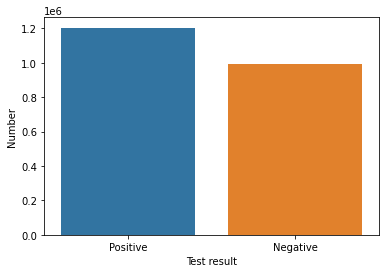

In [250]:
# Number of positives and negatives , quite balanced

ax = sns.countplot(x =df2['CLASIFICACION_FINAL'])
ax.set(xlabel = 'Test result')
ax.set(ylabel = 'Number')
ax.set_xticklabels(['Positive', 'Negative'])
plt.show()

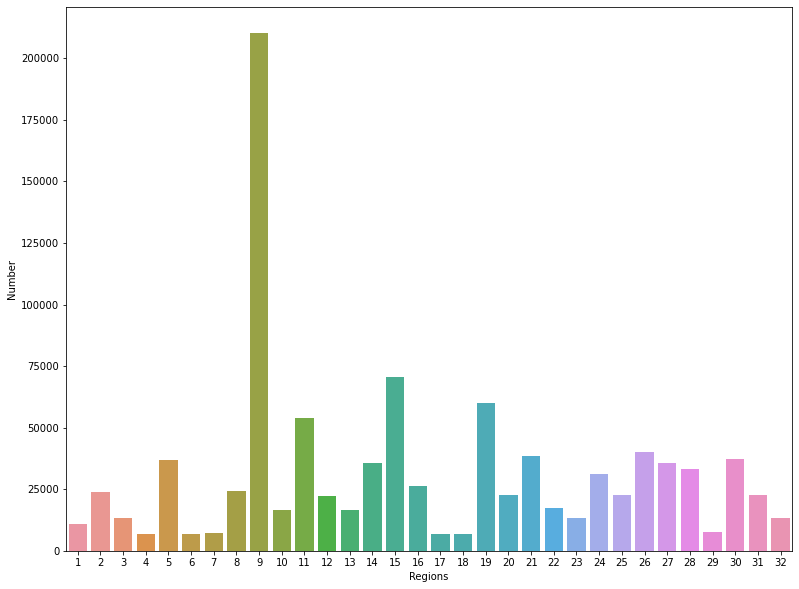

In [259]:
# Positives per region, the highest one is in Mexico City

'''01	AGUASCALIENTES
02	BAJA CALIFORNIA
03	BAJA CALIFORNIA SUR
04	CAMPECHE
05	COAHUILA DE ZARAGOZA
06	COLIMA
07	CHIAPAS
08	CHIHUAHUA
09	CIUDAD DE MÉXICO
10	DURANGO
11	GUANAJUATO
12	GUERRERO
13	HIDALGO
14	JALISCO
15	MÉXICO
16	MICHOACÁN DE OCAMPO
17	MORELOS
18	NAYARIT
19	NUEVO LEÓN
20	OAXACA
21	PUEBLA
22	QUERÉTARO
23	QUINTANA ROO
24	SAN LUIS POTOSÍ
25	SINALOA
26	SONORA
27	TABASCO
28	TAMAULIPAS
29	TLAXCALA
30	VERACRUZ DE IGNACIO DE LA LLAVE
31	YUCATÁN
32	ZACATECAS
36	ESTADOS UNIDOS MEXICANOS
97	NO APLICA
98	SE IGNORA'''


fig, ax = plt.subplots(figsize=(13,10))
ax = sns.countplot(x =df2[df2['CLASIFICACION_FINAL']==1]['ENTIDAD_UM'])
ax.set(xlabel = 'Regions')
ax.set(ylabel = 'Number')
#ax.set_xticklabels(['Positive', 'Negative'])
plt.show()

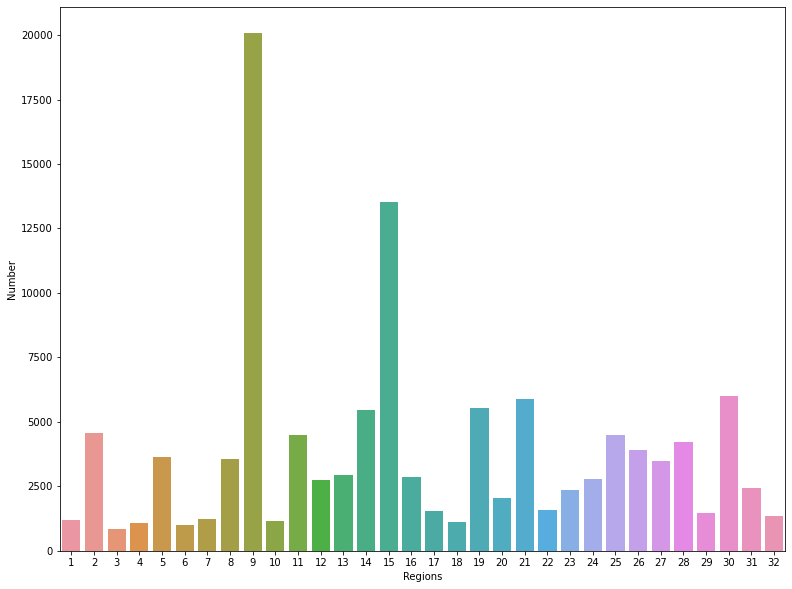

In [261]:
#Deaths per region , highest Mexico City and Mexico
'''01	AGUASCALIENTES
02	BAJA CALIFORNIA
03	BAJA CALIFORNIA SUR
04	CAMPECHE
05	COAHUILA DE ZARAGOZA
06	COLIMA
07	CHIAPAS
08	CHIHUAHUA
09	CIUDAD DE MÉXICO
10	DURANGO
11	GUANAJUATO
12	GUERRERO
13	HIDALGO
14	JALISCO
15	MÉXICO
16	MICHOACÁN DE OCAMPO
17	MORELOS
18	NAYARIT
19	NUEVO LEÓN
20	OAXACA
21	PUEBLA
22	QUERÉTARO
23	QUINTANA ROO
24	SAN LUIS POTOSÍ
25	SINALOA
26	SONORA
27	TABASCO
28	TAMAULIPAS
29	TLAXCALA
30	VERACRUZ DE IGNACIO DE LA LLAVE
31	YUCATÁN
32	ZACATECAS
36	ESTADOS UNIDOS MEXICANOS
97	NO APLICA
98	SE IGNORA'''

fig, ax = plt.subplots(figsize=(13,10))
ax = sns.countplot(x =df2[df2['MUERTE']==1]['ENTIDAD_UM'])
ax.set(xlabel = 'Regions')
ax.set(ylabel = 'Number')
#ax.set_xticklabels(['Positive', 'Negative'])
plt.show()

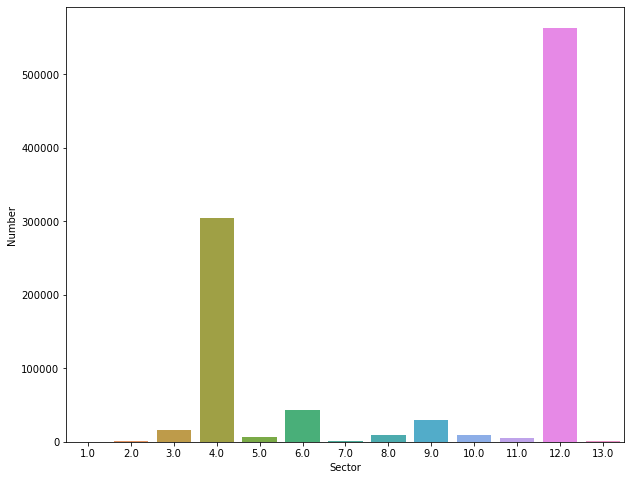

In [263]:
#number of positives per sector (the highest SSA), we can see 3 groups that we can group later 

''' 
1	CRUZ ROJA
2	DIF
3	ESTATAL
4	IMSS
5	IMSS-BIENESTAR
6	ISSSTE
7	MUNICIPAL
8	PEMEX
9	PRIVADA
10	SEDENA
11	SEMAR
12	SSA
13	UNIVERSITARIO'''


fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x =df2[df2['CLASIFICACION_FINAL']==1]['SECTOR'])
ax.set(xlabel = 'Sector')
ax.set(ylabel = 'Number')
#ax.set_xticklabels(['Positive', 'Negative'])
plt.show()

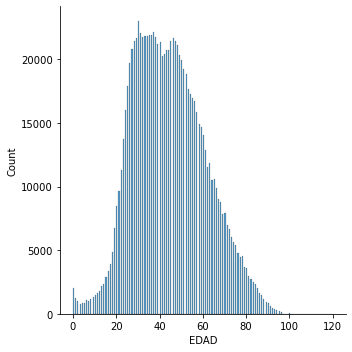

In [269]:
# Distrubition of age of covid positives , there are some outliers 
sns.displot(x = df2[df2['CLASIFICACION_FINAL']==1]['EDAD'])

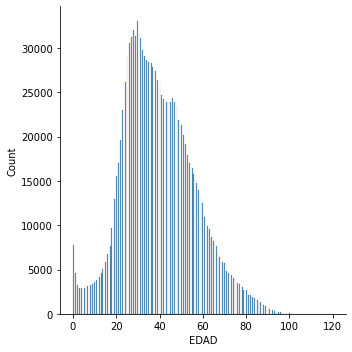

In [270]:
# Distrubition of age of covid negatives 
sns.displot(x = df2[df2['CLASIFICACION_FINAL']==0]['EDAD'])

In [ ]:
# Map of covid positives per region

In [31]:
world_map = folium.Map(location=[21.8818,-102.291], zoom_start=5) 
world_map

In [281]:
mexico = r'C://Users//zhuzh//OneDrive//Рабочий стол//Neoland//proyectos//Covid Mexico//mexico22.json'

In [282]:
mexico

'C://Users//zhuzh//OneDrive//Рабочий стол//Neoland//proyectos//Covid Mexico//mexico22.json'

In [288]:
df_positives = pd.DataFrame(columns = ['Region','Cases'])

In [295]:
df_positives['Region'] = df2[df2['CLASIFICACION_FINAL']==1].groupby('ENTIDAD_UM')['CLASIFICACION_FINAL'].sum().sort_values(ascending = False).index
df_positives['Cases'] = df2[df2['CLASIFICACION_FINAL']==1].groupby('ENTIDAD_UM')['CLASIFICACION_FINAL'].sum().sort_values(ascending = False).values


In [302]:
df_positives

,Region,Cases
0,Ciudad De México,210252
1,México,70447
2,Nuevo León,59957
3,Guanajuato,53865
4,Sonora,40203
5,Puebla,38387
6,Veracruz De Ignacio De La Llave,37292
7,Coahuila De Zaragoza,36928
8,Jalisco,35653
9,Tabasco,35554


In [300]:
df_positives["Region"] = df_positives["Region"].replace({
                1 : "AGUASCALIENTES",
                2 : "BAJA CALIFORNIA",
                3 : "BAJA CALIFORNIA SUR",
                4 : "CAMPECHE",
                5 : "COAHUILA DE ZARAGOZA",
                6 : "COLIMA",
                7 : "CHIAPAS",
                8 : "CHIHUAHUA",
                9 : "CDMX",
                10 : "DURANGO",
                11 : "GUANAJUATO",
                12 : "GUERRERO",
                13 : "HIDALGO",
                14 : "JALISCO",
                15 : "MÉXICO",
                16 : "MICHOACÁN DE OCAMPO",
                17 : "MORELOS",
                18 : "NAYARIT",
                19 : "NUEVO LEÓN",
                20 : "OAXACA",
                21 : "PUEBLA",
                22 : "QUERÉTARO",
                23 : "QUINTANA ROO",
                24 : "SAN LUIS POTOSÍ",
                25 : "SINALOA",
                26 : "SONORA",
                27 : "TABASCO",
                28 : "TAMAULIPAS",
                29 : "TLAXCALA",
                30 : "VERACRUZ DE IGNACIO DE LA LLAVE",
                31 : "YUCATAN",
                32 : "ZACATECAS",
                36 : "ESTADOS UNIDOS MEXICANOS"
                })



In [301]:
df_positives["Region"] = df_positives["Region"].map(lambda x:x.title())

In [310]:
df_positives["Region"] = df_positives["Region"].replace({'Ciudad De México':'CDMX','México':'Estado De Mexico', 'Yucatán':'Yucatan', 'Nuevo León':'Nuevo Leon', 'San Luis Potosí':'San Luis Potosi', 'Querétaro':'Queretaro', 'Michoacán De Ocampo': 'Michoacan De Ocampo'  })

In [309]:
df_positives

,Region,Cases
0,CDMX,210252
1,Estado De Mexico,70447
2,Nuevo Leon,59957
3,Guanajuato,53865
4,Sonora,40203
5,Puebla,38387
6,Veracruz De Ignacio De La Llave,37292
7,Coahuila De Zaragoza,36928
8,Jalisco,35653
9,Tabasco,35554


In [313]:
world_map.choropleth(
    geo_data=mexico,
    data=df_positives, 
    columns=['Region', 'Cases'], 
    key_on='feature.properties.name', 
     fill_color='Greens', 
     fill_opacity=0.7, 
     line_opacity=0.2,
     legend_name='Positive cases per region '
)
world_map

In [287]:
df2[df2['CLASIFICACION_FINAL']==1].groupby('ENTIDAD_UM')['CLASIFICACION_FINAL'].sum().sort_values(ascending = False)

ENTIDAD_UM
9     210252
15     70447
19     59957
11     53865
26     40203
21     38387
30     37292
5      36928
14     35653
27     35554
28     33288
24     31236
16     26514
8      24453
2      23918
31     22563
25     22535
20     22466
12     22309
22     17262
10     16721
13     16490
3      13416
23     13333
32     13281
1      10973
29      7497
7       7197
6       7001
17      6880
18      6822
4       6771
Name: CLASIFICACION_FINAL, dtype: int64

In [ ]:
# deaths per region

In [323]:
df_d = pd.DataFrame(columns = ['Region','Deaths'])

In [324]:
df_d['Region'] = df2[df2['MUERTE']==1].groupby('ENTIDAD_UM')['CLASIFICACION_FINAL'].sum().sort_values(ascending = False).index
df_d['Deaths'] = df2[df2['MUERTE']==1].groupby('ENTIDAD_UM')['CLASIFICACION_FINAL'].sum().sort_values(ascending = False).values


In [329]:
df_d["Region"] = df_d["Region"].replace({
                1 : "AGUASCALIENTES",
                2 : "BAJA CALIFORNIA",
                3 : "BAJA CALIFORNIA SUR",
                4 : "CAMPECHE",
                5 : "COAHUILA DE ZARAGOZA",
                6 : "COLIMA",
                7 : "CHIAPAS",
                8 : "CHIHUAHUA",
                9 : "CDMX",
                10 : "DURANGO",
                11 : "GUANAJUATO",
                12 : "GUERRERO",
                13 : "HIDALGO",
                14 : "JALISCO",
                15 : "MÉXICO",
                16 : "MICHOACÁN DE OCAMPO",
                17 : "MORELOS",
                18 : "NAYARIT",
                19 : "NUEVO LEÓN",
                20 : "OAXACA",
                21 : "PUEBLA",
                22 : "QUERÉTARO",
                23 : "QUINTANA ROO",
                24 : "SAN LUIS POTOSÍ",
                25 : "SINALOA",
                26 : "SONORA",
                27 : "TABASCO",
                28 : "TAMAULIPAS",
                29 : "TLAXCALA",
                30 : "VERACRUZ DE IGNACIO DE LA LLAVE",
                31 : "YUCATAN",
                32 : "ZACATECAS",
                36 : "ESTADOS UNIDOS MEXICANOS"
                })

In [330]:
df_d["Region"] = df_d["Region"].map(lambda x:x.title())

In [334]:
df_d["Region"] = df_d["Region"].replace({'Cdmx':'CDMX','México':'Estado De Mexico', 'Yucatán':'Yucatan', 'Nuevo León':'Nuevo Leon', 'San Luis Potosí':'San Luis Potosi', 'Querétaro':'Queretaro', 'Michoacán De Ocampo': 'Michoacan De Ocampo'  })

In [335]:
df_d

,Region,Deaths
0,CDMX,16004
1,Estado De Mexico,10989
2,Veracruz De Ignacio De La Llave,4995
3,Puebla,4867
4,Nuevo Leon,4252
5,Jalisco,4097
6,Baja California,3772
7,Guanajuato,3616
8,Sinaloa,3523
9,Sonora,3265


In [339]:
world_map.choropleth(
    geo_data=mexico,
    data=df_d, 
    columns=['Region', 'Deaths'], 
    key_on='feature.properties.name', 
     fill_color='Reds', 
     fill_opacity=0.7, 
     line_opacity=0.2,
     legend_name='Deaths per region '
)
world_map

# Section 3 Machine Learning Models 

In [ ]:
# clusters to describe patients according to the sicknesses, age, if they were hospitalized, etc 

In [20]:
df2

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI
0,2,9.0,21,2,1,2020-03-18,2020-03-12,9999-99-99,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1,1,2.0
1,1,4.0,5,1,1,2020-04-02,2020-03-27,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0
2,2,4.0,9,2,2,2020-03-26,2020-03-26,2020-03-30,2.0,1.0,...,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1,1,1.0
3,1,4.0,15,2,2,2020-03-28,2020-03-28,2020-04-02,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0
4,1,12.0,15,1,1,2020-03-31,2020-03-27,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226000,2,10.0,9,2,2,2020-10-03,2020-10-01,2020-10-20,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0
2226002,1,12.0,26,2,1,2020-10-13,2020-10-09,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2,1,2.0
2226003,1,6.0,9,1,2,2020-10-16,2020-10-09,2020-10-24,1.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0
2226004,2,10.0,9,2,2,2020-11-09,2020-11-09,9999-99-99,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1,2.0


In [359]:
for i in df2.columns:
    print(df2[i].value_counts(normalize=True)*100)
    print('******')

2    67.155433
1    32.844567
Name: ORIGEN, dtype: float64
******
12.0    64.021757
4.0     25.329665
6.0      3.752668
9.0      2.732070
3.0      1.611436
8.0      0.776654
5.0      0.595440
10.0     0.591431
11.0     0.359150
7.0      0.081451
13.0     0.079447
2.0      0.053116
1.0      0.015716
Name: SECTOR, dtype: float64
******
9     26.026007
15     7.117714
11     5.902555
19     5.607454
21     3.841772
14     3.749935
5      3.749889
27     3.712899
28     3.500024
24     3.198591
26     3.064024
16     2.855021
30     2.742730
31     2.136950
25     1.918563
2      1.842578
8      1.823081
12     1.769874
10     1.726187
3      1.629339
1      1.475229
22     1.453135
20     1.450629
13     1.286179
32     1.178716
23     1.067700
29     1.046973
4      0.729688
17     0.692333
7      0.602592
6      0.555170
18     0.546469
Name: ENTIDAD_UM, dtype: float64
******
1    51.398584
2    48.601416
Name: SEXO, dtype: float64
******
1    84.54144
2    15.45856
Name: TIPO_PACIENTE,

## New data frame for analysis

In [23]:
df_cluser = df2.drop(['ORIGEN','NACIONALIDAD','TOMA_MUESTRA','CLASIFICACION_FINAL', 'MUERTE'],axis=1) #we will not take into account this variables

In [24]:
df_cluser = df_cluser.reset_index(drop=True)

In [25]:
df_cluser['SECTOR'] = df_cluser['SECTOR'].replace({12.0:1, 4.0:2, 6.0:3, 9.0:3, 8.0 :3, 3.0:3, 5.0:3,10.0:3, 11.0:3, 7.0:3,13.0:3,  2.0:3, 1.0:3    })
#we group the sector variable in 3

In [26]:
df_cluser['SECTOR'].value_counts()

1.0    1405396
2.0     556033
3.0     233756
Name: SECTOR, dtype: int64

In [36]:
df_cluser

,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,...,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI
0,3.0,21,2,1,2020-03-18,2020-03-12,9999-99-99,2.0,2.0,75.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
1,2.0,5,1,1,2020-04-02,2020-03-27,9999-99-99,2.0,2.0,47.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
2,2.0,9,2,2,2020-03-26,2020-03-26,2020-03-30,2.0,1.0,58.0,...,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0
3,2.0,15,2,2,2020-03-28,2020-03-28,2020-04-02,2.0,1.0,49.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
4,1.0,15,1,1,2020-03-31,2020-03-27,9999-99-99,2.0,2.0,27.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195180,3.0,9,2,2,2020-10-03,2020-10-01,2020-10-20,2.0,2.0,56.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2195181,1.0,26,2,1,2020-10-13,2020-10-09,9999-99-99,2.0,2.0,29.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
2195182,3.0,9,1,2,2020-10-16,2020-10-09,2020-10-24,1.0,1.0,62.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2195183,3.0,9,2,2,2020-11-09,2020-11-09,9999-99-99,2.0,2.0,68.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [373]:
df_cluser.iloc[120540,:]

SECTOR                     1
ENTIDAD_UM                 8
SEXO                       1
TIPO_PACIENTE              1
FECHA_INGRESO     2020-06-04
FECHA_SINTOMAS    2020-05-30
FECHA_DEF         9999-99-99
INTUBADO                   2
NEUMONIA                   2
EDAD                      30
EMBARAZO                   2
DIABETES                   2
EPOC                       2
ASMA                       2
INMUSUPR                   2
HIPERTENSION               2
OTRA_COM                   2
CARDIOVASCULAR             2
OBESIDAD                   2
RENAL_CRONICA              2
TABAQUISMO                 2
OTRO_CASO                  1
UCI                        2
Name: 120540, dtype: object

In [27]:
# we want to creat new columns with information about how many days passed between simptoms and death, simptoms and hospitalization
#and hospitalization and death
lista_fechas = []
for i in range(len(df_cluser)):
    fechasimp = datetime.datetime.strptime(df_cluser.loc[i,'FECHA_SINTOMAS'], "%Y-%m-%d")
    fechai = datetime.datetime.strptime(df_cluser.loc[i,'FECHA_INGRESO'], "%Y-%m-%d")
    lista_fechas.append((fechai  - fechasimp).days)


In [376]:
lista_fechas

[6,
 6,
 0,
 0,
 4,
 4,
 4,
 2,
 4,
 0,
 4,
 11,
 3,
 5,
 0,
 1,
 6,
 5,
 1,
 7,
 0,
 8,
 6,
 10,
 2,
 0,
 3,
 4,
 3,
 1,
 5,
 5,
 6,
 3,
 5,
 11,
 0,
 4,
 3,
 9,
 8,
 9,
 7,
 7,
 1,
 7,
 12,
 6,
 3,
 9,
 8,
 2,
 6,
 4,
 1,
 8,
 4,
 1,
 4,
 3,
 1,
 0,
 0,
 8,
 8,
 1,
 13,
 6,
 14,
 10,
 1,
 10,
 1,
 0,
 12,
 5,
 0,
 13,
 0,
 4,
 4,
 0,
 0,
 10,
 8,
 0,
 8,
 5,
 7,
 10,
 7,
 8,
 0,
 2,
 9,
 3,
 2,
 0,
 7,
 7,
 3,
 9,
 5,
 13,
 4,
 4,
 6,
 10,
 1,
 3,
 1,
 3,
 7,
 0,
 7,
 27,
 15,
 7,
 16,
 4,
 7,
 2,
 7,
 1,
 0,
 12,
 8,
 0,
 6,
 6,
 7,
 2,
 0,
 5,
 1,
 1,
 1,
 2,
 4,
 5,
 4,
 2,
 2,
 7,
 9,
 9,
 4,
 7,
 0,
 14,
 4,
 3,
 2,
 5,
 8,
 1,
 0,
 4,
 2,
 3,
 4,
 12,
 3,
 10,
 3,
 0,
 7,
 11,
 10,
 8,
 6,
 4,
 3,
 3,
 2,
 4,
 7,
 10,
 4,
 7,
 9,
 2,
 6,
 2,
 5,
 3,
 10,
 2,
 6,
 4,
 2,
 1,
 10,
 7,
 4,
 13,
 14,
 5,
 12,
 15,
 5,
 0,
 33,
 8,
 9,
 6,
 1,
 5,
 0,
 3,
 9,
 5,
 10,
 5,
 3,
 2,
 2,
 9,
 2,
 11,
 7,
 4,
 4,
 2,
 5,
 6,
 5,
 5,
 6,
 14,
 1,
 2,
 0,
 7,
 7,
 2,
 1,
 0,
 9,
 3,
 3,
 1

In [28]:
df_cluser['DIF_ING_SINT'] = lista_fechas 

In [29]:
lista_fechas2 = []
for i in range(len(df_cluser)):
    if df_cluser.loc[i,'FECHA_DEF'] == '9999-99-99':
        lista_fechas2.append(999)
    else:
        fechasimp = datetime.datetime.strptime(df_cluser.loc[i,'FECHA_SINTOMAS'], "%Y-%m-%d")
        fechadef = datetime.datetime.strptime(df_cluser.loc[i,'FECHA_DEF'], "%Y-%m-%d")
  
        lista_fechas2.append((fechadef  - fechasimp).days)


In [380]:
lista_fechas2

[999,
 999,
 4,
 5,
 999,
 999,
 11,
 999,
 999,
 4,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 13,
 999,
 999,
 7,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 6,
 999,
 999,
 13,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 30,
 999,
 999,
 999,
 999,
 999,
 8,
 7,
 999,
 999,
 999,
 21,
 27,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 8,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 11,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 29,
 999,
 39,
 20,
 999,
 999,
 22,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 15,
 999,
 999,
 999,
 10,
 999,
 999,
 999,
 17,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 999,
 12,
 999,
 999,
 999,

In [30]:
lista_fechas3 = []
for i in range(len(df_cluser)):
    if df_cluser.loc[i,'FECHA_DEF'] == '9999-99-99':
        lista_fechas3.append(999)
    else:
        fechai = datetime.datetime.strptime(df_cluser.loc[i,'FECHA_INGRESO'], "%Y-%m-%d")
        fechadef = datetime.datetime.strptime(df_cluser.loc[i,'FECHA_DEF'], "%Y-%m-%d")
  
        lista_fechas3.append((fechadef  - fechai).days)

In [31]:
df_cluser['DIF_DEF_SINT'] = lista_fechas2
df_cluser['DIF_DEF_ING'] = lista_fechas3

In [32]:
df_cluser = df_cluser.drop(['FECHA_INGRESO','FECHA_SINTOMAS', 'FECHA_DEF'], axis=1)

In [48]:
df_cluser.columns

Index(['SECTOR', 'ENTIDAD_UM', 'SEXO', 'TIPO_PACIENTE', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'UCI', 'DIF_ING_SINT',
       'DIF_DEF_SINT', 'DIF_DEF_ING'],
      dtype='object')

In [50]:
#df_cluser.to_csv('covidclean.csv', index=False)

In [33]:
df_pca = df_cluser[['SECTOR','ENTIDAD_UM','SEXO','TIPO_PACIENTE', 'INTUBADO', 'NEUMONIA', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
                   'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
                   'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'UCI' ]]

In [ ]:
# we will apply dimansionality reduction 

In [388]:
df_pca

,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,UCI
0,3.0,21,2,1,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
1,2.0,5,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
2,2.0,9,2,2,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0
3,2.0,15,2,2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
4,1.0,15,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195180,3.0,9,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2195181,1.0,26,2,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
2195182,3.0,9,1,2,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2195183,3.0,9,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [34]:
#transforming data
sc= MinMaxScaler()
df_sc = sc.fit_transform(df_pca)

In [392]:
df_sc.shape

(2195185, 19)

In [ ]:
#trying to reduce dimensionality

In [35]:
matriz_covarianza = np.cov(df_sc.T)

In [36]:
eigen_vals, eigen_vecs = np.linalg.eigh(matriz_covarianza)
tot = sum(eigen_vals) 
var = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

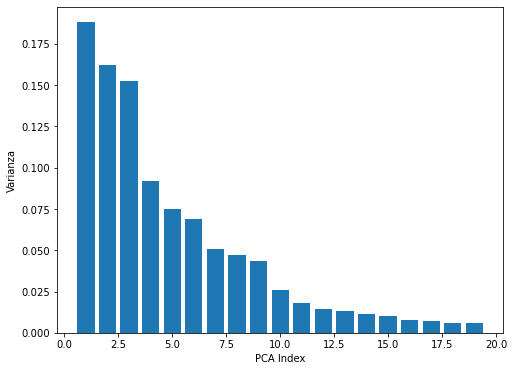

In [55]:
plt.figure(figsize=(8,6))
plt.bar(range(1, 20), var)
plt.ylabel('Varianza')
plt.xlabel('PCA Index')
plt.show()
#we will have to use at least 8 variables to get to 80% of variability explanation 

In [37]:
pca = PCA(n_components=8)
df_sc = pca.fit_transform(df_sc)

In [398]:

df_sc.shape

(2195185, 8)

In [38]:
df_sc = pd.DataFrame(df_sc)
df_sc

,0,1,2,3,4,5,6,7
0,0.775189,-0.037616,-0.245753,0.046977,-0.040153,-0.846354,0.078279,0.830678
1,-0.634867,0.128343,0.221130,-0.245010,0.040694,-0.199432,0.143828,-0.025352
2,1.224068,-0.111026,1.415396,-0.095367,-0.641404,0.060233,0.064235,0.132987
3,0.652499,-0.441133,0.726950,-0.852055,0.143460,0.314264,-0.107522,-0.099949
4,-0.704789,0.103344,0.126300,-0.108703,-0.126894,0.139356,-0.069436,0.003166
...,...,...,...,...,...,...,...,...
2195180,0.931682,-0.046000,-0.174267,-0.620912,0.307300,-0.382249,0.115886,-0.062023
2195181,-0.163625,-0.714051,-0.026815,-0.029940,-0.107794,0.031784,-0.281575,0.045079
2195182,1.056711,1.067808,0.676783,-0.586162,-0.049776,-0.195041,0.138495,-0.700612
2195183,0.931682,-0.046000,-0.174267,-0.620912,0.307300,-0.382249,0.115886,-0.062023


In [39]:
df_edad_fechas = df_cluser[['DIF_ING_SINT', 'DIF_DEF_SINT', 'DIF_DEF_ING','EDAD']]

In [40]:
df_edad_fechas

,DIF_ING_SINT,DIF_DEF_SINT,DIF_DEF_ING,EDAD
0,6,999,999,75.0
1,6,999,999,47.0
2,0,4,4,58.0
3,0,5,5,49.0
4,4,999,999,27.0
...,...,...,...,...
2195180,2,19,17,56.0
2195181,4,999,999,29.0
2195182,7,15,8,62.0
2195183,0,999,999,68.0


In [40]:
#we want to apply PCA in order to visualise the data but we will not use it 
df_edad_fechas_pca = pd.concat((df_sc,df_edad_fechas),axis=1)

In [42]:
df_edad_fechas_pca

,0,1,2,3,4,5,6,7,DIF_ING_SINT,DIF_DEF_SINT,DIF_DEF_ING,EDAD
0,0.775189,-0.037616,-0.245753,0.046977,-0.040153,-0.846354,0.078282,0.830685,6,999,999,75.0
1,-0.634867,0.128343,0.221130,-0.245010,0.040695,-0.199433,0.143830,-0.025351,6,999,999,47.0
2,1.224068,-0.111027,1.415397,-0.095378,-0.641434,0.060273,0.064015,0.132677,0,4,4,58.0
3,0.652499,-0.441133,0.726950,-0.852055,0.143461,0.314263,-0.107514,-0.099939,0,5,5,49.0
4,-0.704789,0.103344,0.126300,-0.108703,-0.126894,0.139355,-0.069432,0.003170,4,999,999,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2195180,0.931682,-0.046000,-0.174267,-0.620912,0.307301,-0.382251,0.115894,-0.062014,2,19,17,56.0
2195181,-0.163625,-0.714051,-0.026815,-0.029940,-0.107794,0.031784,-0.281575,0.045080,4,999,999,29.0
2195182,1.056711,1.067808,0.676783,-0.586157,-0.049760,-0.195061,0.138607,-0.700456,7,15,8,62.0
2195183,0.931682,-0.046000,-0.174267,-0.620912,0.307301,-0.382251,0.115894,-0.062014,0,999,999,68.0


In [41]:
sc= MinMaxScaler()
df_sc2 = sc.fit_transform(df_edad_fechas_pca)

In [42]:
pca = PCA(n_components=2)
df_2 = pca.fit_transform(df_sc2)

In [45]:
df_2

array([[ 0.02214823, -0.00929581],
       [-0.10176844,  0.08854311],
       [ 1.41856764, -0.24378047],
       ...,
       [ 1.4152854 ,  0.31636886],
       [ 0.06132158, -0.03556102],
       [ 0.08376683,  0.36556615]])

In [43]:
df_2 = pd.DataFrame(df_2)

In [53]:
df_2

,0,1
0,0.022146,-0.009295
1,-0.101769,0.088543
2,1.418566,-0.243780
3,1.290261,-0.373742
4,-0.142499,0.069743
...,...,...
2195180,1.245971,-0.172673
2195181,-0.144123,-0.320195
2195182,1.415288,0.316368
2195183,0.061322,-0.035561


C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

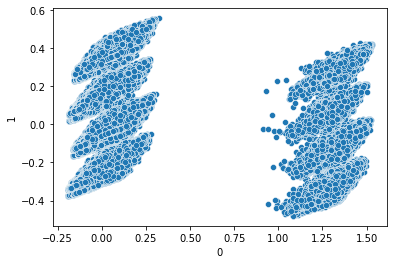

In [44]:
sns.scatterplot(df_2.iloc[:,0], df_2.iloc[:,1]) #we see 8 clusters

In [65]:
df_sc2.shape

(2195185, 12)

# Clustering 

In [418]:
inercias = [] #how many clusters to choose
  
for k in range(1,20): 
    kmeans = KMeans(k)
    kmeans.fit(df_sc2)     
    inercias.append(kmeans.inertia_)  
inercias

[744113.4501335365,
 513175.76589623897,
 415968.38432288077,
 375510.0462944989,
 337695.5798398466,
 315814.1263229986,
 281796.7469291666,
 265661.43646480417,
 252757.74342958085,
 240616.21239704377,
 229813.19020132077,
 218916.02789844025,
 213187.80504024014,
 206614.74556378453,
 200646.66551226078,
 196525.91607734724,
 188454.40256368648,
 184348.5727034382,
 179637.52048340428]

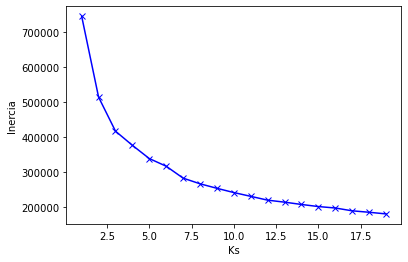

In [420]:
plt.plot(range(1,20), inercias, 'bx-') #encontrar elbow, 2 o 3 o 4 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [426]:
def covid_KMeans(k):

    kmeans = KMeans(k)
    kmeans.fit(df_sc2)

    df_edad_fechas_pca["clase"] = kmeans.labels_
    #df_original["clase"] = kmeans.labels_

    df_cluster = pd.DataFrame()

    for i in range(k):
        df_cluster = pd.concat([df_cluster, df_edad_fechas_pca[df_edad_fechas_pca["clase"] == i].mean()], axis = 1)

    print(df_edad_fechas_pca["clase"].value_counts())
    print("Silhouette Score:", silhouette_score(df_sc2, kmeans.labels_))
    print("Davies Bouldin Score:", davies_bouldin_score(df_sc2, kmeans.labels_))
    return df_cluster.T.reset_index(drop = True)


In [429]:
covid_KMeans(8)

5    499503
3    402101
1    332772
7    313913
4    200582
0    170266
6    155508
2    120540
Name: clase, dtype: int64


,0,1,2,3,4,5,6,7,DIF_ING_SINT,DIF_DEF_SINT,DIF_DEF_ING,EDAD,clase
0,0.223593,0.175185,0.293440,0.417980,-0.220892,-0.185001,-0.085654,-0.561506,4.088385,999.000000,999.000000,54.060799,0.0
1,-0.076361,0.617124,-0.465426,-0.098626,0.073287,0.019386,-0.024538,-0.006289,3.432068,999.000000,999.000000,37.158838,1.0
2,0.836953,0.203536,0.616855,-0.256305,-0.013927,0.184612,-0.011393,-0.017694,4.612560,12.858868,8.246308,62.267264,2.0
3,-0.081868,-0.682920,0.079792,-0.069394,0.031145,-0.005833,-0.121530,0.005918,3.575298,999.000000,999.000000,36.859187,3.0
4,0.424822,0.267822,0.428802,0.384479,-0.322394,-0.121406,0.019689,0.512965,4.184403,999.000000,999.000000,56.044750,4.0
5,-0.624919,0.138994,0.220395,-0.134364,0.043726,0.023259,-0.049878,0.003242,3.656591,999.000000,999.000000,36.816696,5.0
6,-0.012269,-0.286834,-0.057471,0.153648,0.164523,0.147441,0.806276,-0.037010,3.745216,999.000000,999.000000,38.806473,6.0
7,0.472163,-0.202808,-0.601067,-0.042838,0.062496,-0.016098,-0.100115,-0.004153,3.452119,999.000000,999.000000,37.844766,7.0


C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

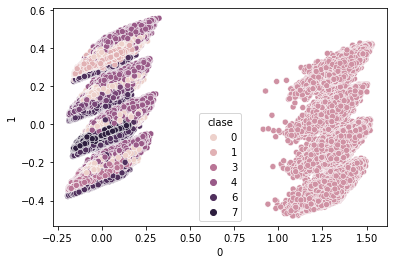

In [430]:
sns.scatterplot(df_2.iloc[:,0], df_2.iloc[:,1], hue = df_edad_fechas_pca["clase"])

In [46]:
def covid_KMeans(k):

    kmeans = KMeans(k)
    kmeans.fit(df_sc2)

    df_edad_fechas_pca["clase"] = kmeans.labels_
    #df_original["clase"] = kmeans.labels_

    df_cluster = pd.DataFrame()

    for i in range(k):
        df_cluster = pd.concat([df_cluster, df_edad_fechas_pca[df_edad_fechas_pca["clase"] == i].mean()], axis = 1)

    print(df_edad_fechas_pca["clase"].value_counts())
    #print("Silhouette Score:", silhouette_score(df_sc2, kmeans.labels_))
    #print("Davies Bouldin Score:", davies_bouldin_score(df_sc2, kmeans.labels_))
    return df_cluster.T.reset_index(drop = True)


In [47]:
covid_KMeans(3) #trial with 3 clusters


1    1083766
2     990879
0     120540
Name: clase, dtype: int64


,0,1,2,3,4,5,6,7,DIF_ING_SINT,DIF_DEF_SINT,DIF_DEF_ING,EDAD,clase
0,0.836953,0.203536,0.616855,-0.256305,-0.013929,0.184615,-0.011406,-0.017718,4.612560,12.858868,8.246308,62.267264,0.0
1,-0.319994,0.374293,0.040533,-0.014563,0.002847,0.000710,0.011188,-0.000107,3.676251,999.000000,999.000000,40.373111,1.0
2,0.248176,-0.434140,-0.119373,0.047108,-0.001420,-0.023235,-0.010850,0.002272,3.656868,999.000000,999.000000,40.552426,2.0


C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

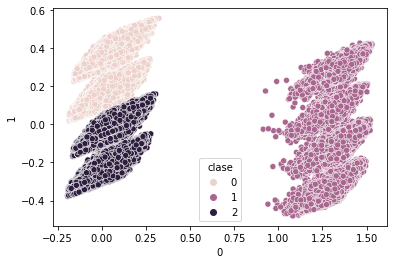

In [50]:
sns.scatterplot(df_2.iloc[:,0], df_2.iloc[:,1], hue = df_edad_fechas_pca["clase"])

1    2074645
0     120540
Name: clase, dtype: int64


C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

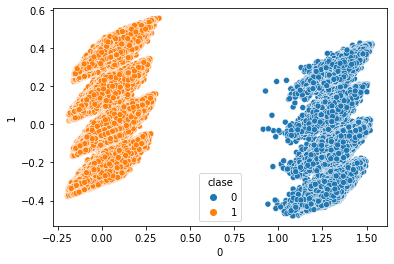

In [432]:
covid_KMeans(2)
sns.scatterplot(df_2.iloc[:,0], df_2.iloc[:,1], hue = df_edad_fechas_pca["clase"])

0    974915
3    890398
2    209332
1    120540
Name: clase, dtype: int64


C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

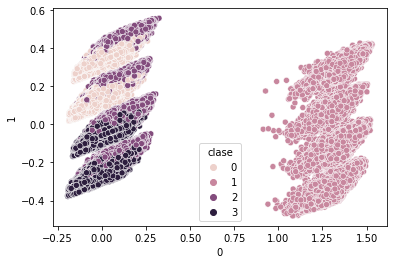

In [433]:
covid_KMeans(4)
sns.scatterplot(df_2.iloc[:,0], df_2.iloc[:,1], hue = df_edad_fechas_pca["clase"])

In [ ]:
# we choose 3 clusters

In [49]:
 #assign clases to the initial dataframe 

In [48]:
df2 = df2.drop(['FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF'],axis=1)

In [49]:
df2 =df2.reset_index(drop = True)

In [62]:
df_edad_fechas_pca

,0,1,2,3,4,5,6,7,DIF_ING_SINT,DIF_DEF_SINT,DIF_DEF_ING,EDAD,clase
0,0.775189,-0.037616,-0.245753,0.046977,-0.040153,-0.846354,0.078282,0.830685,6,999,999,75.0,1
1,-0.634867,0.128343,0.221130,-0.245010,0.040695,-0.199433,0.143830,-0.025351,6,999,999,47.0,2
2,1.224068,-0.111027,1.415397,-0.095378,-0.641434,0.060273,0.064015,0.132677,0,4,4,58.0,0
3,0.652499,-0.441133,0.726950,-0.852055,0.143461,0.314263,-0.107514,-0.099939,0,5,5,49.0,0
4,-0.704789,0.103344,0.126300,-0.108703,-0.126894,0.139355,-0.069432,0.003170,4,999,999,27.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195180,0.931682,-0.046000,-0.174267,-0.620912,0.307301,-0.382251,0.115894,-0.062014,2,19,17,56.0,0
2195181,-0.163625,-0.714051,-0.026815,-0.029940,-0.107794,0.031784,-0.281575,0.045080,4,999,999,29.0,1
2195182,1.056711,1.067808,0.676783,-0.586157,-0.049760,-0.195061,0.138607,-0.700456,7,15,8,62.0,0
2195183,0.931682,-0.046000,-0.174267,-0.620912,0.307301,-0.382251,0.115894,-0.062014,0,999,999,68.0,1


In [63]:
list(range(3))

[0, 1, 2]

In [50]:
df2['DIF_ING_SINT'] = df_edad_fechas_pca['DIF_ING_SINT']
df2['DIF_DEF_SINT'] = df_edad_fechas_pca['DIF_DEF_SINT']
df2['DIF_DEF_ING'] = df_edad_fechas_pca['DIF_DEF_ING']
df2['EDAD'] = df_edad_fechas_pca['EDAD']
df2['clase'] = df_edad_fechas_pca["clase"]

In [51]:
df2

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,...,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI,MUERTE,DIF_ING_SINT,DIF_DEF_SINT,DIF_DEF_ING,clase
0,2,9.0,21,2,1,2.0,2.0,75.0,1,2.0,...,2.0,2.0,1,1,2.0,0,6,999,999,2
1,1,4.0,5,1,1,2.0,2.0,47.0,1,2.0,...,2.0,1.0,1,1,2.0,0,6,999,999,1
2,2,4.0,9,2,2,2.0,1.0,58.0,1,2.0,...,2.0,1.0,1,1,1.0,1,0,4,4,0
3,1,4.0,15,2,2,2.0,1.0,49.0,1,2.0,...,2.0,1.0,1,1,2.0,1,0,5,5,0
4,1,12.0,15,1,1,2.0,2.0,27.0,1,2.0,...,2.0,1.0,1,1,2.0,0,4,999,999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195180,2,10.0,9,2,2,2.0,2.0,56.0,1,2.0,...,2.0,2.0,2,1,2.0,1,2,19,17,0
2195181,1,12.0,26,2,1,2.0,2.0,29.0,1,2.0,...,2.0,1.0,2,1,2.0,0,4,999,999,2
2195182,1,6.0,9,1,2,1.0,1.0,62.0,1,2.0,...,2.0,2.0,2,1,2.0,1,7,15,8,0
2195183,2,10.0,9,2,2,2.0,2.0,68.0,1,2.0,...,2.0,2.0,2,1,2.0,0,0,999,999,2


In [59]:
df2.columns

Index(['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA',
       'CLASIFICACION_FINAL', 'UCI', 'MUERTE', 'clase', 'DIF_ING_SINT',
       'DIF_DEF_SINT', 'DIF_DEF_ING'],
      dtype='object')

In [55]:
df2

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,...,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI,MUERTE,clase,DIF_ING_SINT,DIF_DEF_SINT,DIF_DEF_ING
0,2,9.0,21,2,1,2.0,2.0,75.0,1,2.0,...,2.0,2.0,1,1,2.0,0,1.0,6.0,999.0,999.0
1,1,4.0,5,1,1,2.0,2.0,47.0,1,2.0,...,2.0,1.0,1,1,2.0,0,2.0,6.0,999.0,999.0
2,2,4.0,9,2,2,2.0,1.0,58.0,1,2.0,...,2.0,1.0,1,1,1.0,1,0.0,0.0,4.0,4.0
3,1,4.0,15,2,2,2.0,1.0,49.0,1,2.0,...,2.0,1.0,1,1,2.0,1,0.0,0.0,5.0,5.0
4,1,12.0,15,1,1,2.0,2.0,27.0,1,2.0,...,2.0,1.0,1,1,2.0,0,2.0,4.0,999.0,999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226000,2,10.0,9,2,2,2.0,2.0,NaN,1,2.0,...,2.0,2.0,2,1,2.0,1,NaN,NaN,NaN,NaN
2226002,1,12.0,26,2,1,2.0,2.0,NaN,1,2.0,...,2.0,1.0,2,1,2.0,0,NaN,NaN,NaN,NaN
2226003,1,6.0,9,1,2,1.0,1.0,NaN,1,2.0,...,2.0,2.0,2,1,2.0,1,NaN,NaN,NaN,NaN
2226004,2,10.0,9,2,2,2.0,2.0,NaN,1,2.0,...,2.0,2.0,2,1,2.0,0,NaN,NaN,NaN,NaN


In [67]:
df2.to_csv('covidclean.csv', index=False)

In [68]:
df2[df2["clase"] == 0].mean()

ORIGEN                  1.430405
SECTOR                  6.680778
ENTIDAD_UM             16.213863
SEXO                    1.630596
TIPO_PACIENTE           1.899237
INTUBADO                1.710743
NEUMONIA                1.287880
EDAD                   62.267264
NACIONALIDAD            1.001618
EMBARAZO                1.998913
DIABETES                1.612726
EPOC                    1.946798
ASMA                    1.980504
INMUSUPR                1.968533
HIPERTENSION            1.546283
OTRA_COM                1.935673
CARDIOVASCULAR          1.939929
OBESIDAD                1.772540
RENAL_CRONICA           1.915862
TABAQUISMO              1.914833
OTRO_CASO               1.511938
TOMA_MUESTRA            1.024390
CLASIFICACION_FINAL     0.797710
UCI                     1.899021
MUERTE                  1.000000
clase                   0.000000
DIF_ING_SINT            4.612560
DIF_DEF_SINT           12.858868
DIF_DEF_ING             8.246308
dtype: float64

In [53]:
#find centroids of the clusters to compare
df_resumen = pd.DataFrame()
for i in range(3):
    df_resumen = pd.concat([df_resumen, df2[df2["clase"] == i].mean()], axis = 1)
df_resumen

,0,0,0
ORIGEN,1.430405,1.682776,1.688617
SECTOR,6.680778,9.558942,9.607882
ENTIDAD_UM,16.213863,15.127839,15.306110
SEXO,1.630596,1.000000,2.000000
TIPO_PACIENTE,1.899237,1.093791,1.130493
INTUBADO,1.710743,1.995967,1.992868
NEUMONIA,1.287880,1.936565,1.910892
EDAD,62.267264,40.373111,40.552426
NACIONALIDAD,1.001618,1.004160,1.005628
EMBARAZO,1.998913,1.982477,2.000000


C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

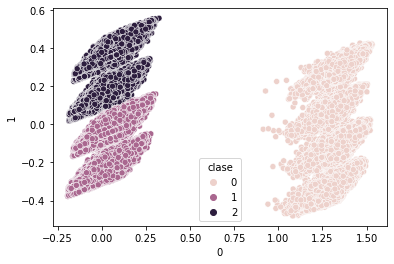

In [70]:
sns.scatterplot(df_2.iloc[:,0], df_2.iloc[:,1], hue = df_edad_fechas_pca["clase"])

In [70]:
#try with 2 clusters

1    2074645
0     120540
Name: clase, dtype: int64


C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

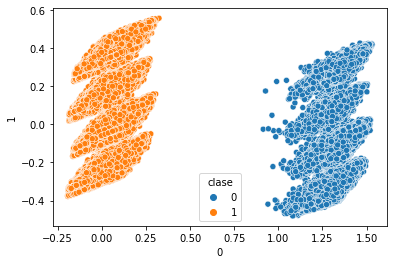

In [54]:
covid_KMeans(2)
sns.scatterplot(df_2.iloc[:,0], df_2.iloc[:,1], hue = df_edad_fechas_pca["clase"])

In [56]:
df3 = df2.copy()
df3['clase'] = df_edad_fechas_pca["clase"]

In [76]:
df3

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,...,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI,MUERTE,clase,DIF_ING_SINT,DIF_DEF_SINT,DIF_DEF_ING
0,2,9.0,21,2,1,2.0,2.0,75.0,1,2.0,...,2.0,2.0,1,1,2.0,0,1,6,999,999
1,1,4.0,5,1,1,2.0,2.0,47.0,1,2.0,...,2.0,1.0,1,1,2.0,0,1,6,999,999
2,2,4.0,9,2,2,2.0,1.0,58.0,1,2.0,...,2.0,1.0,1,1,1.0,1,0,0,4,4
3,1,4.0,15,2,2,2.0,1.0,49.0,1,2.0,...,2.0,1.0,1,1,2.0,1,0,0,5,5
4,1,12.0,15,1,1,2.0,2.0,27.0,1,2.0,...,2.0,1.0,1,1,2.0,0,1,4,999,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195180,2,10.0,9,2,2,2.0,2.0,56.0,1,2.0,...,2.0,2.0,2,1,2.0,1,0,2,19,17
2195181,1,12.0,26,2,1,2.0,2.0,29.0,1,2.0,...,2.0,1.0,2,1,2.0,0,1,4,999,999
2195182,1,6.0,9,1,2,1.0,1.0,62.0,1,2.0,...,2.0,2.0,2,1,2.0,1,0,7,15,8
2195183,2,10.0,9,2,2,2.0,2.0,68.0,1,2.0,...,2.0,2.0,2,1,2.0,0,1,0,999,999


In [57]:
df_resumen2 = pd.DataFrame()
for i in range(2):
    df_resumen2 = pd.concat([df_resumen2, df3[df3["clase"] == i].mean()], axis = 1)
df_resumen2.T.reset_index(drop = True)

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,...,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI,MUERTE,DIF_ING_SINT,DIF_DEF_SINT,DIF_DEF_ING,clase
0,1.430405,6.680778,16.213863,1.630596,1.899237,1.710743,1.287880,62.267264,1.001618,1.998913,...,1.914833,1.511938,1.024390,0.797710,1.899021,1.0,4.612560,12.858868,8.246308,0.0
1,1.685565,9.582316,15.212984,1.477614,1.111320,1.994487,1.924303,40.458754,1.004862,1.990846,...,1.916918,1.421890,1.010579,0.431548,1.992350,0.0,3.666994,999.000000,999.000000,1.0


In [80]:
df_resumen2

,0,0
ORIGEN,1.430405,1.685565
SECTOR,6.680778,9.582316
ENTIDAD_UM,16.213863,15.212984
SEXO,1.630596,1.477614
TIPO_PACIENTE,1.899237,1.111320
INTUBADO,1.710743,1.994487
NEUMONIA,1.287880,1.924303
EDAD,62.267264,40.458754
NACIONALIDAD,1.001618,1.004862
EMBARAZO,1.998913,1.990846


In [ ]:
#we see that our clustering model has grouped the patients into those who survided and those who dies, although this variables
#were not used in the analysis

# make new clusters from the "survived" pacients 

clase 0 - those who die, age 62, smoking doesn't influence , more diabetes, more hiprtension, more obesity, the rest of sicknesses don't influence. mean days between hospitalization and death 8 days, mean days between simptoms and death 12. 
clase 1 - those who didnt die, age 40

In [77]:
df3

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,...,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI,MUERTE,DIF_ING_SINT,DIF_DEF_SINT,DIF_DEF_ING,clase
0,2,9.0,21,2,1,2.0,2.0,75.0,1,2.0,...,2.0,2.0,1,1,2.0,0,6,999,999,1
1,1,4.0,5,1,1,2.0,2.0,47.0,1,2.0,...,2.0,1.0,1,1,2.0,0,6,999,999,1
2,2,4.0,9,2,2,2.0,1.0,58.0,1,2.0,...,2.0,1.0,1,1,1.0,1,0,4,4,0
3,1,4.0,15,2,2,2.0,1.0,49.0,1,2.0,...,2.0,1.0,1,1,2.0,1,0,5,5,0
4,1,12.0,15,1,1,2.0,2.0,27.0,1,2.0,...,2.0,1.0,1,1,2.0,0,4,999,999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195180,2,10.0,9,2,2,2.0,2.0,56.0,1,2.0,...,2.0,2.0,2,1,2.0,1,2,19,17,0
2195181,1,12.0,26,2,1,2.0,2.0,29.0,1,2.0,...,2.0,1.0,2,1,2.0,0,4,999,999,1
2195182,1,6.0,9,1,2,1.0,1.0,62.0,1,2.0,...,2.0,2.0,2,1,2.0,1,7,15,8,0
2195183,2,10.0,9,2,2,2.0,2.0,68.0,1,2.0,...,2.0,2.0,2,1,2.0,0,0,999,999,1


In [78]:
df_survived = df3[df3['clase'] == 1]

In [80]:
df_survived.reset_index(drop = True)

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,...,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,CLASIFICACION_FINAL,UCI,MUERTE,DIF_ING_SINT,DIF_DEF_SINT,DIF_DEF_ING,clase
0,2,9.0,21,2,1,2.0,2.0,75.0,1,2.0,...,2.0,2.0,1,1,2.0,0,6,999,999,1
1,1,4.0,5,1,1,2.0,2.0,47.0,1,2.0,...,2.0,1.0,1,1,2.0,0,6,999,999,1
2,1,12.0,15,1,1,2.0,2.0,27.0,1,2.0,...,2.0,1.0,1,1,2.0,0,4,999,999,1
3,1,4.0,3,2,1,2.0,2.0,38.0,1,2.0,...,2.0,1.0,1,1,2.0,0,4,999,999,1
4,1,12.0,9,1,1,2.0,2.0,49.0,1,2.0,...,2.0,2.0,1,1,2.0,0,2,999,999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074640,1,12.0,26,1,1,2.0,2.0,37.0,1,2.0,...,2.0,1.0,2,1,2.0,0,14,999,999,1
2074641,2,12.0,9,1,1,2.0,2.0,0.0,1,2.0,...,2.0,2.0,2,1,2.0,0,4,999,999,1
2074642,1,12.0,26,2,1,2.0,2.0,29.0,1,2.0,...,2.0,1.0,2,1,2.0,0,4,999,999,1
2074643,2,10.0,9,2,2,2.0,2.0,68.0,1,2.0,...,2.0,2.0,2,1,2.0,0,0,999,999,1


In [81]:
sc= MinMaxScaler()
df_survived_sc = sc.fit_transform(df_survived)

In [99]:
kmeans = KMeans(4)
kmeans.fit(df_survived_sc)


KMeans(n_clusters=4)

In [100]:
df_survived["clase2"] = kmeans.labels_

df_cluster = pd.DataFrame()

for i in range(4):
    df_cluster = pd.concat([df_cluster, df_survived[df_survived["clase2"] == i].mean()], axis = 1)

<ipython-input-100-0970dc1bf256>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survived["clase2"] = kmeans.labels_


In [109]:
df_cluster.columns = ['hombres_negativos', 'mujeres_positivas', 'mujeres_negativas', 'hombres_positivos']
#we finally have 4 clusters of those who survived, men and women, positive and negative

In [112]:
df_cluster

,hombres_negativos,mujeres_positivas,mujeres_negativas,hombres_positivos
ORIGEN,1.713546,1.656930,1.701026,1.658256
SECTOR,10.008182,9.172223,9.832009,9.120363
ENTIDAD_UM,14.761009,15.716394,14.712253,15.969982
SEXO,2.000000,1.000000,1.000000,2.000000
TIPO_PACIENTE,1.094260,1.123677,1.072688,1.174621
INTUBADO,1.994705,1.994643,1.996902,1.990630
NEUMONIA,1.940352,1.910967,1.954640,1.875013
EDAD,38.931812,42.049822,39.189163,42.526151
NACIONALIDAD,1.006984,1.003295,1.004772,1.003977
EMBARAZO,2.000000,1.984443,1.981089,2.000000


The clusters get split by sex and test result. the "negative men" and "negative women" clusters are much healthier than the positive ones. We can see that the positive one have higher hypertension (2 is no and yes is 1), neumonia, diabetes and obesity. The age of negative patients is lower than the positives. 

In [123]:
df3.mean()

ORIGEN                   1.671554
SECTOR                   9.422990
ENTIDAD_UM              15.267943
SEXO                     1.486014
TIPO_PACIENTE            1.154586
INTUBADO                 1.978906
NEUMONIA                 1.889356
EDAD                    41.656283
NACIONALIDAD             1.004683
EMBARAZO                 1.991289
DIABETES                 1.883375
EPOC                     1.988032
ASMA                     1.972265
INMUSUPR                 1.988774
HIPERTENSION             1.844335
OTRA_COM                 1.977667
CARDIOVASCULAR           1.982175
OBESIDAD                 1.853757
RENAL_CRONICA            1.983503
TABAQUISMO               1.916803
OTRO_CASO                1.426835
TOMA_MUESTRA             1.011338
CLASIFICACION_FINAL      0.451654
UCI                      1.987226
MUERTE                   0.054911
DIF_ING_SINT             3.718916
DIF_DEF_SINT           944.849916
DIF_DEF_ING            944.596635
clase                    0.945089
dtype: float64

In [126]:
#general df survived 
for i in df_survived.columns:
    print(df_survived[i].value_counts(normalize=True)*100)
    print('******')

2    68.556548
1    31.443452
Name: ORIGEN, dtype: float64
******
12.0    66.067014
4.0     23.509757
6.0      3.555741
9.0      2.808529
3.0      1.598780
8.0      0.738295
5.0      0.578798
10.0     0.548817
11.0     0.358808
7.0      0.084063
13.0     0.079146
2.0      0.055913
1.0      0.016340
Name: SECTOR, dtype: float64
******
9     26.570425
15     6.879972
11     6.029610
19     5.665837
5      3.791781
21     3.781755
27     3.761559
14     3.705019
28     3.500358
24     3.250869
26     3.052811
16     2.883288
30     2.612302
31     2.143499
25     1.813467
10     1.771339
8      1.757072
12     1.740057
2      1.728874
3      1.683854
1      1.502715
22     1.461792
20     1.436535
13     1.219197
32     1.182178
29     1.037286
23     1.016656
4      0.720171
17     0.657944
7      0.578268
6      0.538646
18     0.524861
Name: ENTIDAD_UM, dtype: float64
******
1    52.238624
2    47.761376
Name: SEXO, dtype: float64
******
1    88.867975
2    11.132025
Name: TIPO_PACIENT

clase0 : hombres covid negativos, 
clase 1 : mujeres positivas,
clase 2: mujeres negativas
clase 3: hombres positivos

In [103]:
df_survived[df_survived['clase2']==0] 
for i in df_survived[df_survived['clase2']==0].columns:
    print(df_survived[df_survived['clase2']==0][i].value_counts(normalize=True)*100)
    print('******')

2    71.354611
1    28.645389
Name: ORIGEN, dtype: float64
******
12.0    71.702885
4.0     18.899785
6.0      2.983577
9.0      2.856765
3.0      1.488848
8.0      0.722278
5.0      0.455972
10.0     0.390177
11.0     0.265203
13.0     0.088952
7.0      0.080498
2.0      0.043557
1.0      0.021503
Name: SECTOR, dtype: float64
******
9     30.811120
15     6.934234
11     6.191924
19     5.292293
27     4.009285
21     3.986679
14     3.759888
5      3.662665
28     3.642449
24     3.290131
16     3.018129
31     2.124563
26     2.077146
3      1.963383
30     1.810289
1      1.754234
10     1.705347
25     1.536081
12     1.331344
29     1.257645
2      1.237061
8      1.173288
22     1.111903
32     1.108412
13     0.913966
4      0.835306
23     0.830344
20     0.746721
17     0.607044
7      0.492362
18     0.392750
6      0.392015
Name: ENTIDAD_UM, dtype: float64
******
2    100.0
Name: SEXO, dtype: float64
******
1    90.573999
2     9.426001
Name: TIPO_PACIENTE, dtype: float64
*

In [104]:
df_survived[df_survived['clase2']==1]
for i in df_survived[df_survived['clase2']==1].columns:
    print(df_survived[df_survived['clase2']==1][i].value_counts(normalize=True)*100)
    print('******')

2    65.692991
1    34.307009
Name: ORIGEN, dtype: float64
******
12.0    60.892984
4.0     28.038240
6.0      4.192705
9.0      2.594858
3.0      1.686579
5.0      0.702946
8.0      0.652114
10.0     0.616220
11.0     0.386364
7.0      0.086503
2.0      0.073349
13.0     0.067552
1.0      0.009587
Name: SECTOR, dtype: float64
******
9     21.881612
15     6.567961
19     6.123855
11     5.954194
26     4.525562
5      3.917814
27     3.640693
14     3.596550
21     3.555082
30     3.291115
24     3.282643
28     3.167603
16     2.702317
8      2.455517
2      2.370129
12     2.227667
25     2.200468
20     2.187983
31     2.165688
10     1.927806
22     1.752125
13     1.545009
3      1.460067
32     1.386272
23     1.174252
1      1.139472
6      0.684441
29     0.679091
18     0.662816
7      0.633164
17     0.598385
4      0.542648
Name: ENTIDAD_UM, dtype: float64
******
1    100.0
Name: SEXO, dtype: float64
******
1    87.632346
2    12.367654
Name: TIPO_PACIENTE, dtype: float64
*

In [105]:
df_survived[df_survived['clase2']==2]
for i in df_survived[df_survived['clase2']==2].columns:
    print(df_survived[df_survived['clase2']==2][i].value_counts(normalize=True)*100)
    print('******')

2    70.102562
1    29.897438
Name: ORIGEN, dtype: float64
******
12.0    70.061159
4.0     20.988311
6.0      3.289858
9.0      2.256838
3.0      1.639891
8.0      0.586249
5.0      0.504703
10.0     0.290763
11.0     0.150970
13.0     0.086898
7.0      0.073045
2.0      0.049274
1.0      0.022039
Name: SECTOR, dtype: float64
******
9     29.807863
15     7.170215
11     6.478492
19     5.202094
14     3.912315
5      3.878783
27     3.734582
21     3.659491
28     3.516864
24     3.233343
16     2.989807
26     2.376323
31     1.929710
30     1.896808
10     1.834153
1      1.828486
3      1.804557
25     1.614074
2      1.415404
12     1.381243
29     1.309930
22     1.306781
8      1.304420
32     0.993664
13     0.988626
23     0.803180
20     0.788382
17     0.742414
4      0.707151
7      0.503916
18     0.443937
6      0.442993
Name: ENTIDAD_UM, dtype: float64
******
1    100.0
Name: SEXO, dtype: float64
******
1    92.731237
2     7.268763
Name: TIPO_PACIENTE, dtype: float64
*

In [106]:
df_survived[df_survived['clase2']==3]
for i in df_survived[df_survived['clase2']==3].columns:
    print(df_survived[df_survived['clase2']==3][i].value_counts(normalize=True)*100)
    print('******')

2    65.825587
1    34.174413
Name: ORIGEN, dtype: float64
******
12.0    58.718750
4.0     28.162778
6.0      3.991118
9.0      3.748710
3.0      1.586062
8.0      1.060508
10.0     1.041259
11.0     0.740655
5.0      0.709094
7.0      0.101619
13.0     0.067821
2.0      0.062896
1.0      0.008729
Name: SECTOR, dtype: float64
******
9     21.510094
15     6.714462
19     6.320297
11     5.269413
21     3.933594
30     3.924865
26     3.724313
5      3.698796
28     3.637914
27     3.619560
14     3.452359
24     3.196073
16     2.749308
31     2.448256
20     2.443779
8      2.410429
12     2.258448
2      2.129745
25     2.046257
22     1.816831
10     1.605311
13     1.591657
3      1.396477
23     1.388867
32     1.335148
1      1.097888
4      0.776691
29     0.740878
7      0.733492
6      0.706856
18     0.662314
17     0.659628
Name: ENTIDAD_UM, dtype: float64
******
2    100.0
Name: SEXO, dtype: float64
******
1    82.537878
2    17.462122
Name: TIPO_PACIENTE, dtype: float64
*